# Time Series Analysis Project
### Part 6: Assess whether advertising expenditures "granger cause" or predict search interest data
### Written By Ali Chen

### Import Packages

In [37]:
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
import seaborn as sns
import matplotlib.pyplot as pyplot
from statistics import mode

In [51]:
#Import adspend weekly CSV
adspend_trends = pd.read_csv('adspend.googletrends.weekly.csv', parse_dates=['FIXED TIME'])

In [52]:
#Set index with "fixed time" column
adspend_trends.set_index('FIXED TIME', inplace=True)

In [53]:
#View list of columns of adspend
list(adspend_trends)

['CABLE TV',
 'MAGAZINES',
 'NAT SPOT RADIO',
 'NATL NEWSP',
 'NETWORK RADIO',
 'NETWORK TV',
 'NEWSPAPER',
 'OUTDOOR',
 'SPOT TV',
 'SUNDAY MAGS',
 'SYNDICATION',
 'TOTAL',
 'Unnamed: 0',
 'value',
 'onedifvalue',
 'TOTALdiff',
 'valuediff']

In [54]:
#Remove unnecessary columns from dataframe
adspend_trends = adspend_trends.drop(columns=['onedifvalue', 'Unnamed: 0', 'TOTALdiff', 'valuediff', 'SUNDAY MAGS'])

In [55]:
#View list of columns of adspend with removed columns
list(adspend_trends)

['CABLE TV',
 'MAGAZINES',
 'NAT SPOT RADIO',
 'NATL NEWSP',
 'NETWORK RADIO',
 'NETWORK TV',
 'NEWSPAPER',
 'OUTDOOR',
 'SPOT TV',
 'SYNDICATION',
 'TOTAL',
 'value']

In [56]:
#Use adf test function to calculate the stationarity of variable columns
#For loop to iterate through columns of dataframe and print adf test output value
for acolumn in list(adspend_trends):
    adf_result = stattools.adfuller(adspend_trends[acolumn])
    print(adf_result[1])

#0.007713880957820469
#0.38905454403377715
#0.10968844638242131
#0.21373439260331528
#0.01890971162318696
#3.4771342980346414e-06
#6.172139576042826e-26
#0.0035242155323943337
#7.869104059518442e-22
#0.0017426017050936465
#0.001545664947020707
#1.985241318472535e-09
#0.12620495847538737

3.127853915752014e-11
3.75627719227519e-09
0.5067120241466552
5.223049731643651e-29
0.01912723131353339
2.4297668535634764e-05
5.223049731644098e-29
0.005846411825341255
0.0008532072242751308
0.0016787178895916553
4.959678665165896e-06
0.10845709610049953


In [57]:
#Create new dataframe for difference in adspend trends
adspend_trends_diff = pd.DataFrame()

In [58]:
#For loop to iterate through dataframe to create new difference column
#%s = placeholder replaced with each column name
for acolumn in list(adspend_trends):
    columnname = "%s_diff" % (acolumn)
    adspend_trends_diff[columnname] = adspend_trends[acolumn].diff(1)

adspend_trends_diff.head()

,CABLE TV_diff,MAGAZINES_diff,NAT SPOT RADIO_diff,NATL NEWSP_diff,NETWORK RADIO_diff,NETWORK TV_diff,NEWSPAPER_diff,OUTDOOR_diff,SPOT TV_diff,SYNDICATION_diff,TOTAL_diff,value_diff
FIXED TIME,,,,,,,,,,,,
2013-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-14,-38.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-27.3,-129.4,-195.4,-1601.560799
2013-10-21,44.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,3.4,48.5,27.615247
2013-10-28,30.8,0.0,0.0,0.0,1.7,0.0,0.0,462.5,1.4,-110.6,385.7,600.678190
2013-11-04,1.7,0.0,0.0,0.0,2.3,430.8,0.0,-462.5,2.4,9.3,-16.0,142.718735


In [59]:
#Use adf test function to calculate the stationarity of variable columns
#For loop to iterate through through columns of differenced dataframe and print adf test output value
for acolumn in list(adspend_trends_diff):
    adf_result = stattools.adfuller(adspend_trends_diff[acolumn].iloc[1:])
    print(adf_result[1])
    
#2.071641414057888e-10
#1.5872089579138634e-11
#8.910735698213089e-12
#1.3640885630889368e-16
#3.8031491692881125e-10
#3.7799271689046578e-06
#1.023435128110326e-18
#4.998138022410804e-10
#1.2063681099345431e-15
#1.2984591085383814e-13
#7.797940010152509e-25
#4.10305220734941e-13
#9.059700391965348e-14

3.207371955000991e-10
8.677904106894232e-15
2.7734131669326794e-11
1.673806383490319e-13
4.1585781953608326e-10
2.3036835544599525e-25
1.6738063834904163e-13
6.672214264934636e-10
5.080732761044655e-27
9.881939573859992e-25
1.1331033227627078e-06
2.126027415421676e-14


In [60]:
#Create variable for correlation list
#For loop to iterate through differenced adspend dataframe to print correlation values
correlationlist = []
for acolumn in list(adspend_trends_diff):
    if "value" not in acolumn:
        corr = adspend_trends_diff[acolumn].corr(adspend_trends_diff['value_diff'])
        print(acolumn, corr)
        correlationlist.append(corr)
#CABLE TV_diff 0.013515637216064306
#MAGAZINES_diff 0.002019546256659398
#NAT SPOT RADIO_diff 0.06984479717598839
#NATL NEWSP_diff 0.03666602985543591
#NETWORK RADIO_diff 0.00808996968809862
#NETWORK TV_diff 0.04750444962072359
#NEWSPAPER_diff -0.09770993732052433
#OUTDOOR_diff -0.03947106729304953
#SPOT TV_diff 0.13903496661534595
#SUNDAY MAGS_diff -0.06064571565325321
#SYNDICATION_diff -0.12290676861675767
#TOTAL_diff 0.0380846923552821

CABLE TV_diff 0.03577507954712865
MAGAZINES_diff -0.0033130316457407895
NAT SPOT RADIO_diff 0.06675726133649122
NATL NEWSP_diff -0.0053517593667680155
NETWORK RADIO_diff 0.008235146850391327
NETWORK TV_diff 0.0440003337157887
NEWSPAPER_diff -0.038567251166430006
OUTDOOR_diff -0.0611312290311334
SPOT TV_diff 0.07710591825232276
SYNDICATION_diff -0.1267984712427169
TOTAL_diff 0.023139463915113928


In [61]:
#Calculate mean of correlation list
mean = np.mean(correlationlist)
mean

#mean = 0.0028355499916677927

0.0018046782876770427

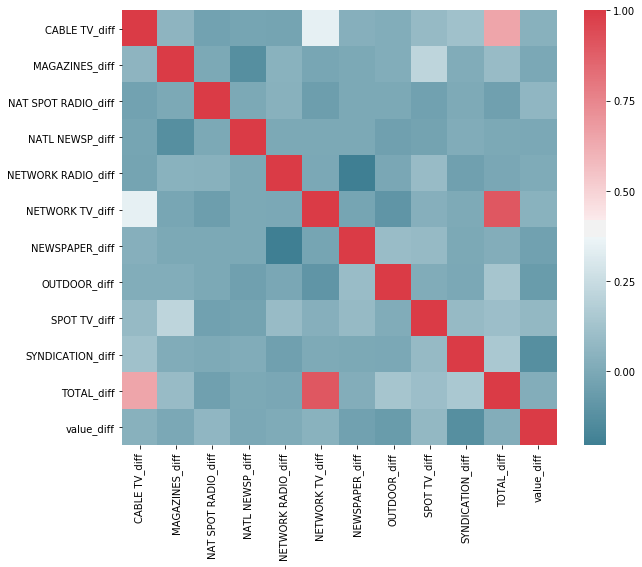

In [62]:
#Set up graph for larger view
f, ax = pyplot.subplots(figsize=(10,8))
#Plot correlation heatmap using seaborn package
corr = adspend_trends_diff.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax )

### Determining Granger Causality

In [63]:
#Run granger causality test to determine lags
#numofweeks = 8 (2 months)
numofweeks = 8
#list of most common/significant lags
significantlags = []
#for loop to iterate through differenced data
for acolumn in list(adspend_trends_diff):
    if 'value' not in acolumn:
        testframe = adspend_trends_diff[['value_diff', acolumn]]
        testframe = testframe.iloc[1:]
        results = stattools.grangercausalitytests(testframe, numofweeks, verbose=False)
        for week in range(1,numofweeks+1):
            if results[week][0]['params_ftest'][1] <.05:
                print('%s is significant at %s weeks' % (acolumn, week))
                significantlags.append(week)
#Output prints significant lags and location
#OUTDOOR_diff is significant at 3 weeks
#OUTDOOR_diff is significant at 4 weeks

NAT SPOT RADIO_diff is significant at 7 weeks
NAT SPOT RADIO_diff is significant at 8 weeks
OUTDOOR_diff is significant at 3 weeks
OUTDOOR_diff is significant at 4 weeks
SPOT TV_diff is significant at 2 weeks
SPOT TV_diff is significant at 3 weeks
SPOT TV_diff is significant at 4 weeks
SPOT TV_diff is significant at 5 weeks
SPOT TV_diff is significant at 7 weeks


In [64]:
#Create new variable for modeling data
modelingdataset = adspend_trends_diff

modelingdataset.tail()

,CABLE TV_diff,MAGAZINES_diff,NAT SPOT RADIO_diff,NATL NEWSP_diff,NETWORK RADIO_diff,NETWORK TV_diff,NEWSPAPER_diff,OUTDOOR_diff,SPOT TV_diff,SYNDICATION_diff,TOTAL_diff,value_diff
FIXED TIME,,,,,,,,,,,,
2018-09-03,0.0,0.0,-40.0,0.0,0.0,508.1,0.0,-676.0,42.7,0.0,-165.1,542.626875
2018-09-10,23.0,0.0,0.0,0.0,0.0,75.9,0.0,0.0,-33.9,0.0,65.0,-1285.732804
2018-09-17,587.4,0.0,0.0,0.0,0.0,4170.4,0.0,0.0,17.8,0.0,4775.6,1059.457829
2018-09-24,104.3,0.0,0.0,0.0,0.0,565.7,0.0,0.0,47.1,0.0,717.0,2655.251636
2018-10-01,78.8,0.0,-11.9,0.0,0.0,-2826.2,0.0,636.9,-19.2,0.0,-2141.7,-4135.399471


In [65]:
#Adding 8 weeks of lag
date = pd.to_datetime('2018-10-08')
modelingdataset.loc[date] = np.nan

date = pd.to_datetime('2018-10-15')
modelingdataset.loc[date] = np.nan

date = pd.to_datetime('2018-10-22')
modelingdataset.loc[date] = np.nan

date = pd.to_datetime('2018-10-29')
modelingdataset.loc[date] = np.nan

date = pd.to_datetime('2018-11-05')
modelingdataset.loc[date] = np.nan

date = pd.to_datetime('2018-11-12')
modelingdataset.loc[date] = np.nan

date = pd.to_datetime('2018-11-19')
modelingdataset.loc[date] = np.nan

date = pd.to_datetime('2018-11-26')
modelingdataset.loc[date] = np.nan

In [66]:
#For loop to add lag columns
for column in list(modelingdataset):
    if 'value' not in column:
        for lag in range(1,9):
            columnname = '%s_lag%s' % (column, lag)
            modelingdataset[columnname] = modelingdataset[column].shift(lag)

In [67]:
#Sort dataframe by index and position
modelingdataset.sort_index(axis=1, inplace=True)
modelingdataset.head(15)

,CABLE TV_diff,CABLE TV_diff_lag1,CABLE TV_diff_lag2,CABLE TV_diff_lag3,CABLE TV_diff_lag4,CABLE TV_diff_lag5,CABLE TV_diff_lag6,CABLE TV_diff_lag7,CABLE TV_diff_lag8,MAGAZINES_diff,...,TOTAL_diff,TOTAL_diff_lag1,TOTAL_diff_lag2,TOTAL_diff_lag3,TOTAL_diff_lag4,TOTAL_diff_lag5,TOTAL_diff_lag6,TOTAL_diff_lag7,TOTAL_diff_lag8,value_diff
FIXED TIME,,,,,,,,,,,,,,,,,,,,,
2013-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-14,-38.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,-195.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1601.560799
2013-10-21,44.7,-38.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,48.5,-195.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.615247
2013-10-28,30.8,44.7,-38.7,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,385.7,48.5,-195.4,NaN,NaN,NaN,NaN,NaN,NaN,600.678190
2013-11-04,1.7,30.8,44.7,-38.7,NaN,NaN,NaN,NaN,NaN,0.0,...,-16.0,385.7,48.5,-195.4,NaN,NaN,NaN,NaN,NaN,142.718735
2013-11-11,155.7,1.7,30.8,44.7,-38.7,NaN,NaN,NaN,NaN,0.0,...,-122.7,-16.0,385.7,48.5,-195.4,NaN,NaN,NaN,NaN,229.787503
2013-11-18,106.1,155.7,1.7,30.8,44.7,-38.7,NaN,NaN,NaN,0.0,...,1073.9,-122.7,-16.0,385.7,48.5,-195.4,NaN,NaN,NaN,-609.065631
2013-11-25,62.4,106.1,155.7,1.7,30.8,44.7,-38.7,NaN,NaN,0.0,...,579.6,1073.9,-122.7,-16.0,385.7,48.5,-195.4,NaN,NaN,1694.454530
2013-12-02,-62.2,62.4,106.1,155.7,1.7,30.8,44.7,-38.7,NaN,0.0,...,-1054.6,579.6,1073.9,-122.7,-16.0,385.7,48.5,-195.4,NaN,-2456.049152


In [68]:
#Download differenced lagged data to CSV
modelingdataset.to_csv('google_adspend_differenced_lagged_fordatarobot.csv')